In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/evankolberg/Library/CloudStorage/OneDrive-Personal/Documents/HALnalysis_summer_2024_data/data/button_game/button_data_well_0.csv', skiprows=1, header=None, names=[
    'frame number', 'button pressed', 'A ratio threshold', 'B ratio threshold', 
    'ratio', 'value A', 'avg A', 'SD A', 'value B', 'avg B', 'SD B'
])

df['frame number'] = df['frame number'].astype(int) / 10000
df['time between presses'] = df['frame number'].diff()

virtual_space = 0
virtual_space_list = []
for button in df['button pressed']:
    if button == 'B':
        virtual_space = min(virtual_space + 1, 10)
    elif button == 'A':
        virtual_space = max(virtual_space - 1, 0)
    virtual_space_list.append(virtual_space)
df['virtual space'] = virtual_space_list

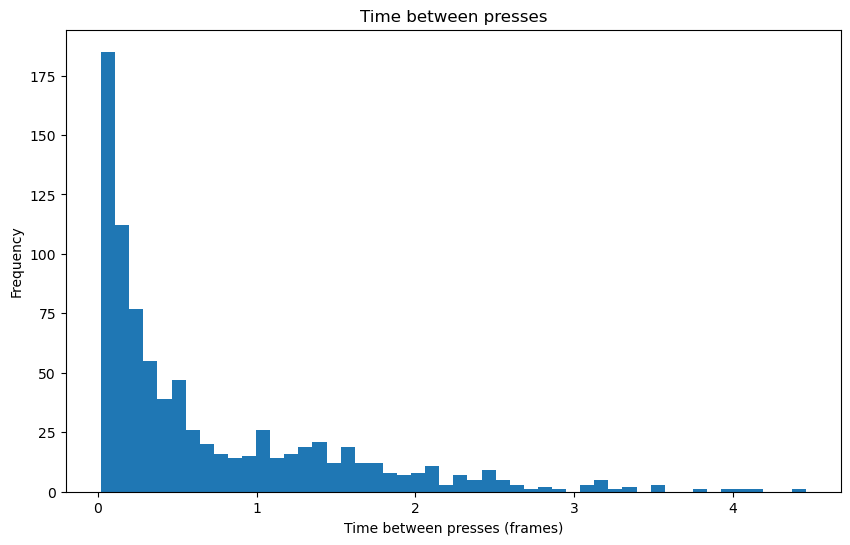

In [2]:
plt.figure(figsize=(10, 6))
plt.hist(df['time between presses'].dropna(), bins=50)
plt.xlabel('Time between presses (seconds)')
plt.ylabel('Frequency')
plt.title('Time between presses')
plt.show()

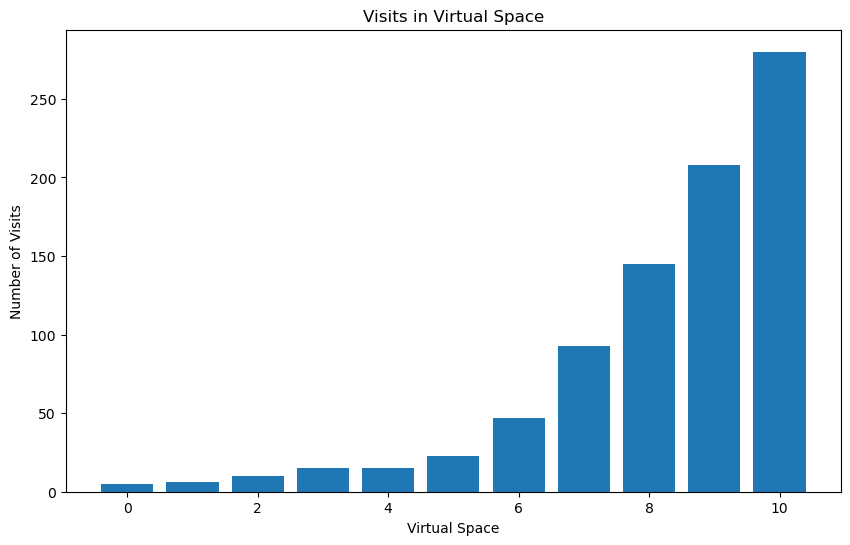

In [3]:
plt.figure(figsize=(10, 6))
plt.hist(df['virtual space'], bins=range(12), align='left', rwidth=0.8)
plt.xlabel('Virtual Space')
plt.ylabel('Number of Visits')
plt.title('Visits in Virtual Space')
plt.show()


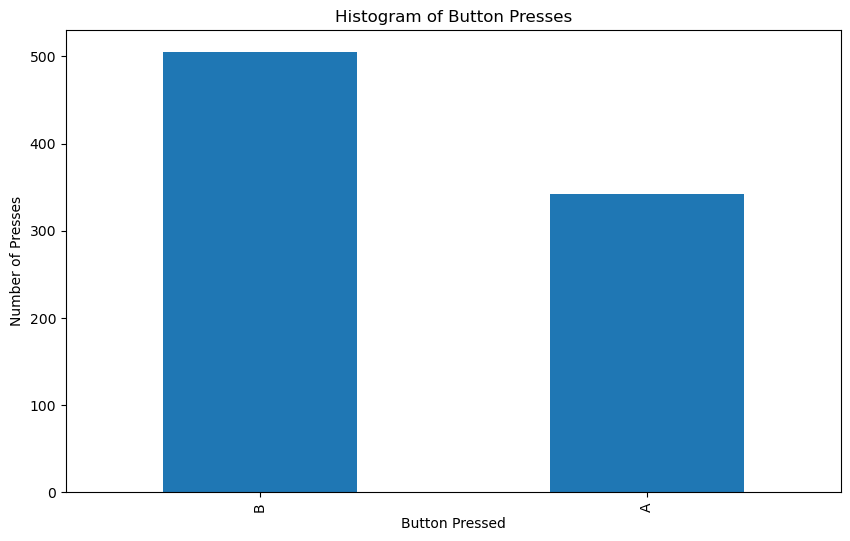

In [4]:
plt.figure(figsize=(10, 6))
df['button pressed'].value_counts().plot(kind='bar')
plt.xlabel('Button Pressed')
plt.ylabel('Number of Presses')
plt.title('Histogram of Button Presses')
plt.show()